In [1]:
# This script estimates the b values from the TexNet catalog
# Author: Kaushik Pradhan (kpradhan@miners.utep.edu)
# Last updated - 05/10/2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
from scipy import stats

In [3]:
#reading the texnet catalog data
tex_net_events = pd.read_csv('texnet_events.csv')
tex_net_events.describe()

,Local Magnitude,Moment Magnitude,Latitude (WGS84),Latitude Error (km),Longitude (WGS84),Longitude Error (km),Depth of Hypocenter (Km. Rel to MSL),Depth of Hypocenter (Km. Rel to Ground Surface),Depth Uncertainty (Km. Corresponds to 1 st dev),RMS,...,Nodal Plane 1 - Strike,Nodal Plane 1 - Dip,Nodal Plane 1 - Rake,Nodal Plane 2 - Strike,Nodal Plane 2 - Dip,Nodal Plane 2 - Rake,Focal Mechanism - Azimuthal Gap,Focal Mechanism - Misfit,Maximum Station Distance (km),Minimum Station Distance (km)
count,24822.000000,46.000000,24822.000000,24822.000000,24822.000000,24822.000000,24822.000000,24822.000000,24822.000000,24822.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,66.000000,66.000000,24822.000000,2908.000000
mean,1.848606,3.886957,31.552585,0.813001,-103.237675,0.749295,6.186838,7.131355,1.585759,0.229313,...,145.151899,58.746835,-45.531646,177.531646,55.588608,-36.031646,107.083026,0.277959,86.406529,5.382143
std,0.608922,0.436964,0.778395,1.652299,1.741507,1.250060,1.974341,2.052153,0.906521,0.086200,...,82.633422,20.614427,89.281040,121.260191,19.933689,99.786678,54.227949,0.190858,61.724266,5.084319
min,-1.000000,3.200000,28.225700,0.200000,-106.003600,0.100000,-0.900000,-0.000000,0.300000,0.000000,...,0.000000,2.000000,-178.000000,0.000000,1.000000,-179.000000,41.192801,0.096772,0.057707,0.053489
25%,1.500000,3.700000,31.406500,0.600000,-104.300275,0.500000,5.100000,6.000000,1.000000,0.200000,...,92.250000,45.000000,-107.000000,43.250000,42.250000,-104.500000,70.437708,0.147308,36.242117,2.775968
50%,1.900000,3.800000,31.641900,0.700000,-103.975650,0.600000,6.400000,7.400000,1.500000,0.200000,...,113.000000,59.500000,-71.000000,227.500000,54.000000,-68.000000,90.751899,0.206923,78.693490,4.244110
75%,2.200000,3.975000,31.698775,0.900000,-103.270125,0.900000,7.300000,8.400000,1.900000,0.300000,...,188.500000,76.750000,5.750000,276.750000,71.750000,5.500000,127.426466,0.340810,122.578007,6.730274
max,5.400000,5.300000,36.263100,168.400000,-93.934700,84.700000,26.000000,26.900000,31.000000,1.100000,...,359.000000,90.000000,180.000000,360.000000,90.000000,179.000000,267.028454,0.904890,710.796869,81.613691


In [4]:
tex_net_events.head()

,EventID,Evaluation Status,Origin Date,Origin Time,Local Magnitude,Moment Magnitude,Latitude (WGS84),Latitude Error (km),Longitude (WGS84),Longitude Error (km),...,Nodal Plane 1 - Rake,Nodal Plane 2 - Strike,Nodal Plane 2 - Dip,Nodal Plane 2 - Rake,Focal Mechanism Method ID,Focal Mechanism - Azimuthal Gap,Focal Mechanism - Misfit,Maximum Station Distance (km),Minimum Station Distance (km),Last Updated
0,texnet2024dikg,final,2024-02-17,06:52:16,3.3,NaN,28.9719,1.0,-97.9650,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.292870,6.755903,2024-02-19 17:26:46
1,texnet2024dijs,final,2024-02-17,06:34:18,3.7,NaN,28.9627,1.7,-97.9360,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.994875,4.425812,2024-02-19 17:25:56
2,texnet2024dijp,final,2024-02-17,06:32:54,4.7,NaN,28.9581,0.6,-98.0053,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.083000,2.722672,2024-02-19 17:22:46
3,texnet2024dijf,final,2024-02-17,06:20:21,4.4,NaN,28.9545,0.5,-98.0053,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.689021,2.563408,2024-02-19 17:24:48
4,texnet2024diek,Automatic,2024-02-17,03:53:14,1.5,NaN,31.6708,1.5,-104.4363,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.074852,1.672291,2024-02-17 04:33:21


In [5]:
tex_net_events.columns

Index(['EventID', 'Evaluation Status', 'Origin Date', 'Origin Time',
       'Local Magnitude', 'Moment Magnitude', 'Latitude (WGS84)',
       'Latitude Error (km)', 'Longitude (WGS84)', 'Longitude Error (km)',
       'Depth of Hypocenter (Km.  Rel to MSL)',
       'Depth of Hypocenter (Km. Rel to Ground Surface)',
       'Depth Uncertainty (Km. Corresponds to 1 st dev)', 'RMS',
       'UsedPhaseCount', 'UsedStationCount', 'Author', 'EventType',
       'LocationName', 'Nodal Plane 1 - Strike', 'Nodal Plane 1 - Dip',
       'Nodal Plane 1 - Rake', 'Nodal Plane 2 - Strike', 'Nodal Plane 2 - Dip',
       'Nodal Plane 2 - Rake', 'Focal Mechanism Method ID',
       'Focal Mechanism - Azimuthal Gap', 'Focal Mechanism - Misfit',
       'Maximum Station Distance (km)', 'Minimum Station Distance (km)',
       'Last Updated'],
      dtype='object')

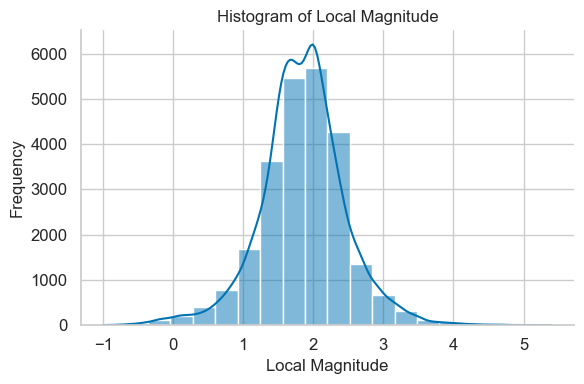

In [6]:
# get the magnitudes only in a list
magnitudes = tex_net_events['Local Magnitude'].values

sns.set(style='whitegrid', palette='colorblind')

plt.figure(figsize=(6, 4)) 
sns.histplot(magnitudes, bins=20, kde=True) 
plt.xlabel('Local Magnitude', fontsize=12)  
plt.ylabel('Frequency', fontsize=12)  
plt.title('Histogram of Local Magnitude', fontsize=12) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True) 
sns.despine() 
plt.tight_layout()  
plt.show()

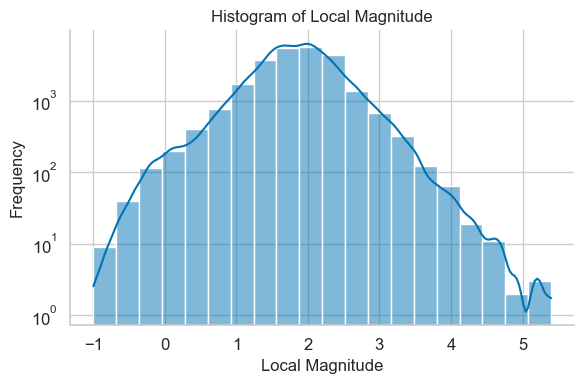

In [7]:
# get the magnitudes only in a list
magnitudes = tex_net_events['Local Magnitude'].values

sns.set(style='whitegrid', palette='colorblind')

plt.figure(figsize=(6, 4)) 
sns.histplot(magnitudes, bins=20, kde=True) 
plt.xlabel('Local Magnitude', fontsize=12)  
plt.ylabel('Frequency', fontsize=12)  
plt.title('Histogram of Local Magnitude', fontsize=12) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True) 
sns.despine() 
plt.yscale('log')  
plt.tight_layout()  
plt.show()

In [8]:
'''The Gutenberg-Richter magnitude-frequency relationship for earthquakes is given by 
log(N(M)) = a - bM where M is magnitude, N(M) is the number of earthquakes of magnitude ≥ M, 
a is a constant, and b determines the relative number of earthquakes of different magnitudes. 
 
The maximum likelihood method of Aki (1965) is the most accurate way to calculate b, but large data 
sets are required. Monte Carlo simulations and equations from Aki (1965) indicate that a minimum of 2000 earthquakes 
are needed to calculate b to within 0.05 at 98% confidence. Also, as is well known, significant problems for b value 
calculation can be caused by choosing a minimum magnitude of completeness, M_C, that is too low. Often M_C is solved 
for by visual or quantitative inspection of logarithmic cumulative magnitude frequency plots for the point of maximum 
curvature. 
'''

# for each m we need to N(M) and then log(N(M))

mag = -1.0
mag_store = []
log_nm_store = []

while mag < np.max(magnitudes):
    mag_store.append(mag)
    
    log_nm_store.append(len([i for i in magnitudes if(i) >= mag]))

    mag = mag + 0.1

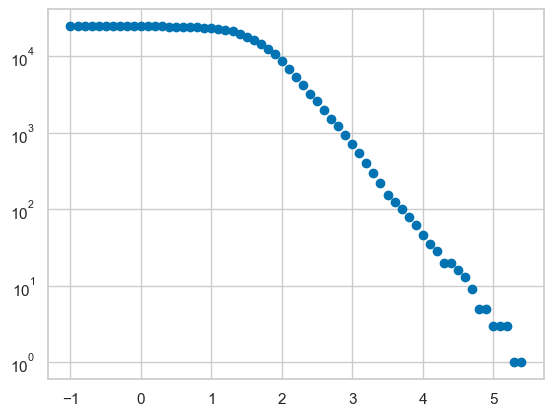

In [9]:
plt.figure()
plt.scatter(mag_store, log_nm_store)
plt.yscale('log')
plt.show()

In [10]:
# find the best fitting line
slope, intercept, r_value, p_value, std_err = stats.linregress(mag_store,np.log(log_nm_store)/np.log(10))
print(slope, intercept, r_value, p_value, std_err)
print('The b value is ', -slope)

-0.7175122523969178 4.672889373590741 -0.9390664970342958 6.443146994619819e-31 0.033089265311145005
The b value is  0.7175122523969178


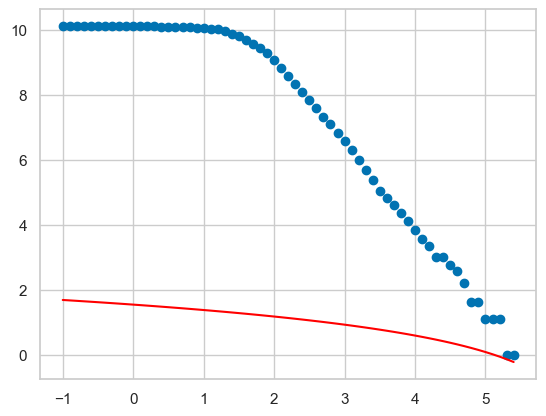

In [11]:
# plotting scatter data and best fitting line
pred_y =  [i * slope + intercept for i in mag_store]

plt.figure()
plt.scatter(mag_store, np.log(log_nm_store))
plt.plot(mag_store, np.log(pred_y), color='red')
plt.show()

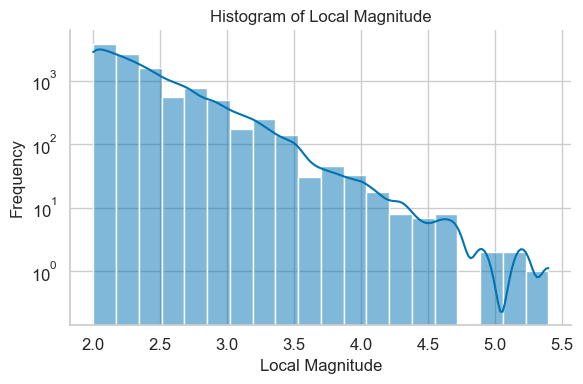

In [12]:
# only take magnitude greater than 2
new_magnitudes = [i for i in magnitudes if i>=2.0]

sns.set(style='whitegrid', palette='colorblind')

plt.figure(figsize=(6, 4)) 
sns.histplot(new_magnitudes, bins=20, kde=True) 
plt.xlabel('Local Magnitude', fontsize=12)  
plt.ylabel('Frequency', fontsize=12)  
plt.title('Histogram of Local Magnitude', fontsize=12) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True) 
sns.despine() 
plt.yscale('log')  
plt.tight_layout()  
plt.show()

In [13]:
mag = 2.0
mag_store = []
log_nm_store = []

while mag < np.max(magnitudes):
    mag_store.append(mag)
    
    log_nm_store.append(len([i for i in magnitudes if(i) >= mag]))

    mag = mag + 0.1

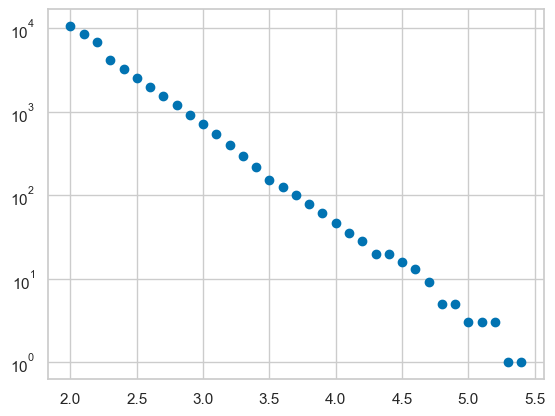

In [14]:
plt.figure()
plt.scatter(mag_store, log_nm_store)
plt.yscale('log')
plt.show()

In [15]:
# find the best fitting line
slope, intercept, r_value, p_value, std_err = stats.linregress(mag_store,np.log(log_nm_store)/np.log(10))
print(slope, intercept, r_value, p_value, std_err)
print('The b value is ', -slope)

-1.1552487264561473 6.308563971309367 -0.9984811385481098 3.950175359639074e-43 0.011096544777651858
The b value is  1.1552487264561473


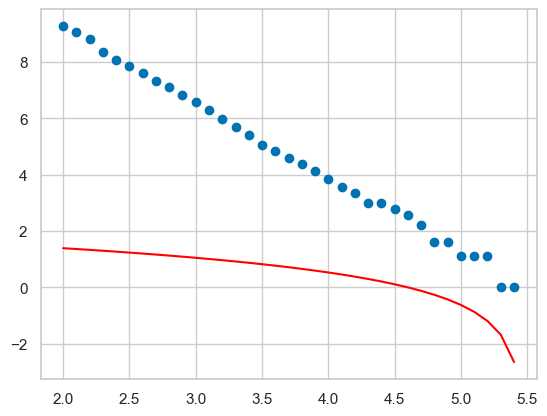

In [16]:
# plotting scatter data and best fitting line
pred_y =  [i * slope + intercept for i in mag_store]

plt.figure()
plt.scatter(mag_store, np.log(log_nm_store))
plt.plot(mag_store, np.log(pred_y), color='red')
plt.show()

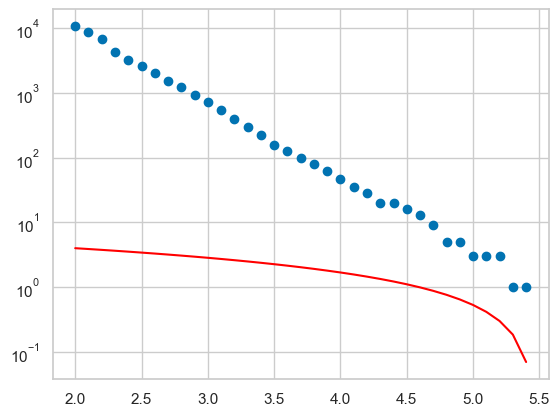

In [17]:
# plotting scatter data and best fitting line
pred_y =  [i * slope + intercept for i in mag_store]

plt.figure()
plt.scatter(mag_store, (log_nm_store))
plt.plot(mag_store, (pred_y), color='red')
plt.yscale('log')
plt.show()